In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset 
load diabetes_data

In [39]:
df = pd.read_csv("diabetes_data.csv")

for i in df.columns[:-1]:
    df[i]=(df[i]-df[i].mean())/df[i].std()


print(df.head())

df1 = df[['Glucose','BloodPressure','Outcome']]
df1.head()

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1    -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2     1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3    -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4    -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468187  1.425067        1  
1                 -0.364823 -0.190548        0  
2                  0.604004 -0.105515        1  
3                 -0.920163 -1.040871        0  
4                  5.481337 -0.020483        1  


,Glucose,BloodPressure,Outcome
0,0.847771,0.149543,1
1,-1.122665,-0.160441,0
2,1.942458,-0.263769,1
3,-0.997558,-0.160441,0
4,0.503727,-1.503707,1


## Divide the dataset into train and test datasets

In [67]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest= tts(df1[df1.columns.difference(["Outcome"])],df1['Outcome'],test_size=0.25,random_state=40)


## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [125]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
    """
    :param X: data matrix (2 dimensional np.array)
    
    """
print(sigmoid(xtrain.loc[1]))


BloodPressure    0.459976
Glucose          0.245517
Name: 1, dtype: float64


In [127]:
def logistic_func(beta,X):
    if type(beta)==int:
        return 1/(1+np.exp(-beta))
    else:
        return 1/(1+np.exp(np.dot(np.array(beta),-X.T)))
    
    """
    :param X: data matrix (2 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    
    """

logistic_func(0, xtrain)

0.5

In [128]:
def gradient(beta, X, Y):
    return np.dot((logistic_func(beta,X) -Y).T,X)
    
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: np.array i.e. gradient according to the data
    
    """
print(gradient(0,xtrain,ytrain))


563    0.5
739   -0.5
554    0.5
720    0.5
652    0.5
      ... 
440   -0.5
165   -0.5
7      0.5
219   -0.5
326   -0.5
Name: Outcome, Length: 576, dtype: float64


In [44]:
def cost_func(X, Y, beta):
    cost=0
    for i in range(X.shape[0]):
        cost+=-Y.iloc[i]*np.log(logistic_func(X.iloc[i],beta))-(1-Y.iloc[i])*np.log(1-logistic_func(X.iloc[i],beta))
    return cost/X.shape[0]


    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: numberic value of the cost function
    """
    
    
cost_func(xtrain,ytrain,np.array([1,2]))

0.7166089091145063

In [122]:

def gradient_descent(X, Y, epsilon=1e-6, step_size=1e-4, max_steps=600):
    n=X.shape[0]
    m=X.shape[1]
    beta=np.zeros(m)

    ls=[cost_func(X, Y, beta)]
    for i in range(max_steps):
        beta = beta - step_size*gradient(beta, X, Y)
        #ls.append(cost_func(X, Y, beta))
        #if ls[-2]-ls[-1]<epsilon:
           # break
    return w0,beta
    
    
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """
gradient_descent(xtrain, ytrain, epsilon=1e-6, step_size=1e-4) 


ValueError: shapes (576,) and (2,576) not aligned: 576 (dim 0) != 2 (dim 0)

In [103]:
#logistic_func(beta,xtest)

## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [63]:
beta=gradient_descent(xtrain, ytrain, epsilon=1e-6, step_size=1e-4)
print(np.where(logistic_func(beta,xtest)>0.5,1,0))
ytest

[1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 0 1]


370    1
388    1
611    1
550    0
232    0
      ..
486    0
598    1
118    0
143    1
199    1
Name: Outcome, Length: 192, dtype: int64

## Use the logistic regression available in Sklearn on the same data.

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',fit_intercept=False)
logreg.fit(xtrain,ytrain)
pred = logreg.predict(xtest)
print(logreg.intercept_,logreg.coef_)
from sklearn.metrics import confusion_matrix as cm
from sklearn import metrics
cm = cm(ytest,pred)
print(cm)
print("Accuracy is %s" % round((cm[1][1]+cm[0][0])/(cm[1][1]+cm[0][0]+cm[1][0]+cm[1][1]),5))
print("Precision is %s" % round(cm[1][1]/(cm[1][1]+cm[0][1]),5))
print("Recall is %s" % round(cm[1][1]/(cm[1][1]+cm[1][0]),5))


0.0 [[-0.01188779  1.09367375]]
[[84 35]
 [18 55]]
Accuracy is 0.65566
Precision is 0.61111
Recall is 0.75342


## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

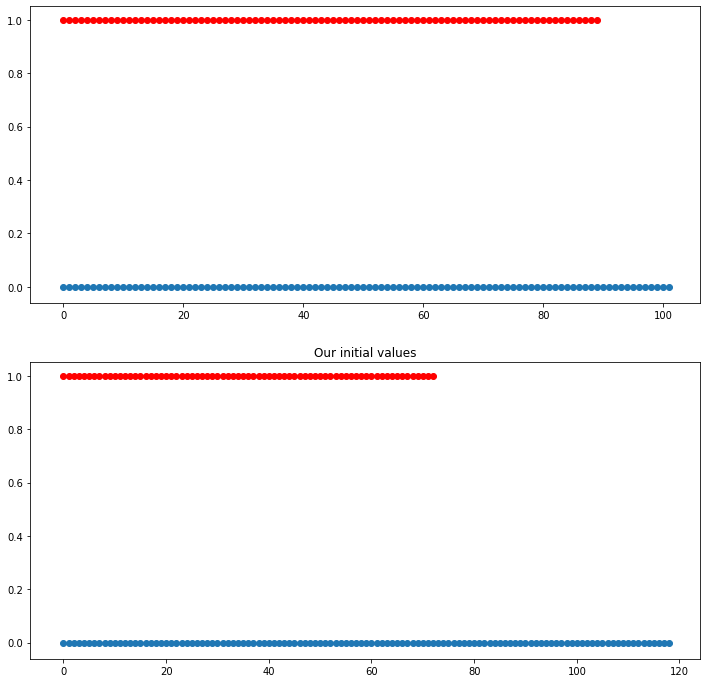

In [110]:
fig , axis = plt.subplots(2,1,figsize=(12,12))
plt.title("Our initial values")

axis[0].scatter(np.arange(len(np.where(pred==0)[0])),pred[pred==0])
axis[0].scatter(np.arange(len(np.where(pred==1)[0])),pred[pred==1],color="r")

axis[1].scatter(np.arange(len(np.where(ytest==0)[0])),ytest[ytest==0])
axis[1].scatter(np.arange(len(np.where(ytest==1)[0])),ytest[ytest==1],color="r")

plt.show()

